In [4]:
#importing libraries and dataset
import pandas as pd
import torch
import numpy as np
from mp_api.client import MPRester

with MPRester("3cc08jX8WHZOYwtfrU6KNl5urhUOy3xL") as mpr:
    docs = mpr.materials.summary.search(band_gap=(0.00001,5.5))

Retrieving SummaryDoc documents:   0%|          | 0/79068 [00:00<?, ?it/s]

c:\Users\ramie\AppData\Local\Programs\Python\Python311\Lib\site-packages\mp_api\client\core\client.py:829: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total

In [5]:
#initializing lists
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []

mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

band_gaps = []

input = []

In [6]:
#Preproccessing of data
for i in range(len(docs)):
    mean_atomic_numbers += [np.mean(docs[i].structure.atomic_numbers)]
    max_atomic_numbers += [np.max(docs[i].structure.atomic_numbers)]
    min_atomic_numbers += [np.min(docs[i].structure.atomic_numbers)]
    std_atomic_numbers += [np.std(docs[i].structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters += [docs[i].structure.lattice.abc[0]]
    b_parameters += [docs[i].structure.lattice.abc[1]]
    c_parameters += [docs[i].structure.lattice.abc[2]]
    alpha_parameters += [docs[i].structure.lattice.angles[0]]
    beta_parameters += [docs[i].structure.lattice.angles[1]]
    gamma_parameters += [docs[i].structure.lattice.angles[2]]

    mean_distance_matrix += [np.mean(docs[i].structure.distance_matrix)]
    max_distance_matrix += [np.max(docs[i].structure.distance_matrix)]
    min_distance_matrix += [np.min(docs[i].structure.distance_matrix)]
    std_distance_matrix += [np.std(docs[i].structure.distance_matrix)]

    band_gaps.append([docs[i].band_gap])
    input.append([mean_atomic_numbers[i],max_atomic_numbers[i],min_atomic_numbers[i],std_atomic_numbers[i],a_parameters[i],b_parameters[i],c_parameters[i],alpha_parameters[i],beta_parameters[i],gamma_parameters[i],mean_distance_matrix[i],max_distance_matrix[i],min_distance_matrix[i],std_distance_matrix[i]])



In [7]:
#Converting the input into a tensor

input = torch.tensor(input, dtype = torch.float32)
band_gaps = torch.tensor(band_gaps, dtype = torch.float32)


In [8]:
#More library imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pymatviz as pmv


In [9]:
#ANN
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(14, 250)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(250, 500)
        self.dropout2 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(500, 750)
        self.dropout3 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(750, 500)
        self.dropout4 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(500,100)
        self.dropout5 = nn.Dropout(p=0.5)
        self.relu =nn.ReLU()
        self.fc6 = nn.Linear(100,1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc6(x)

        return x

In [10]:
#For testing the code purposes
import random

small_input =[]
small_band_gaps =[]
inputlist = input.tolist()
band_gapslist = band_gaps.tolist()
for i in range(100):
    random_i = random.randint(0,len(docs))
    small_input.append(inputlist[i])
    small_band_gaps.append(band_gapslist[i])

small_input = torch.tensor(small_input)
small_band_gaps = torch.tensor(small_band_gaps)


Epoch [100/2500], Train Loss: 1.5518, Val Loss: 1.5972, Train MSE: 1.5518, Val MSE: 1.5972, Train MAE: 1.0218, Val MAE: 1.0369, Train R2: 0.2064, Val R2: 0.1915
Epoch [200/2500], Train Loss: 1.4664, Val Loss: 1.5360, Train MSE: 1.4664, Val MSE: 1.5360, Train MAE: 0.9890, Val MAE: 1.0141, Train R2: 0.2504, Val R2: 0.2219
Epoch [300/2500], Train Loss: 1.4084, Val Loss: 1.5039, Train MSE: 1.4084, Val MSE: 1.5039, Train MAE: 0.9634, Val MAE: 0.9968, Train R2: 0.2796, Val R2: 0.2379
Epoch [400/2500], Train Loss: 1.3713, Val Loss: 1.4835, Train MSE: 1.3713, Val MSE: 1.4835, Train MAE: 0.9494, Val MAE: 0.9882, Train R2: 0.2993, Val R2: 0.2481
Epoch [500/2500], Train Loss: 1.3364, Val Loss: 1.4669, Train MSE: 1.3364, Val MSE: 1.4669, Train MAE: 0.9370, Val MAE: 0.9818, Train R2: 0.3163, Val R2: 0.2565
Epoch [600/2500], Train Loss: 1.3114, Val Loss: 1.4582, Train MSE: 1.3114, Val MSE: 1.4582, Train MAE: 0.9256, Val MAE: 0.9764, Train R2: 0.3292, Val R2: 0.2609
Epoch [700/2500], Train Loss: 1.28

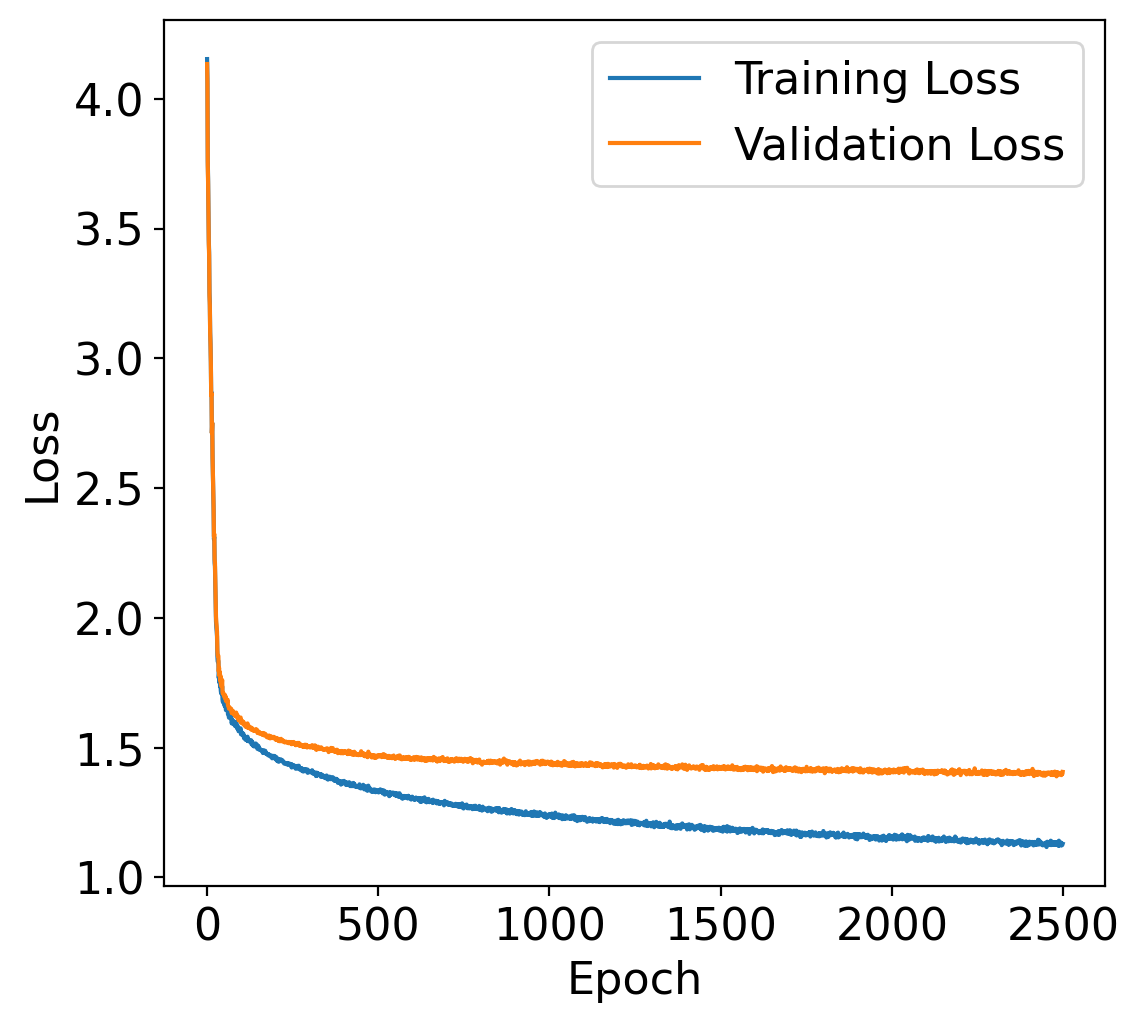

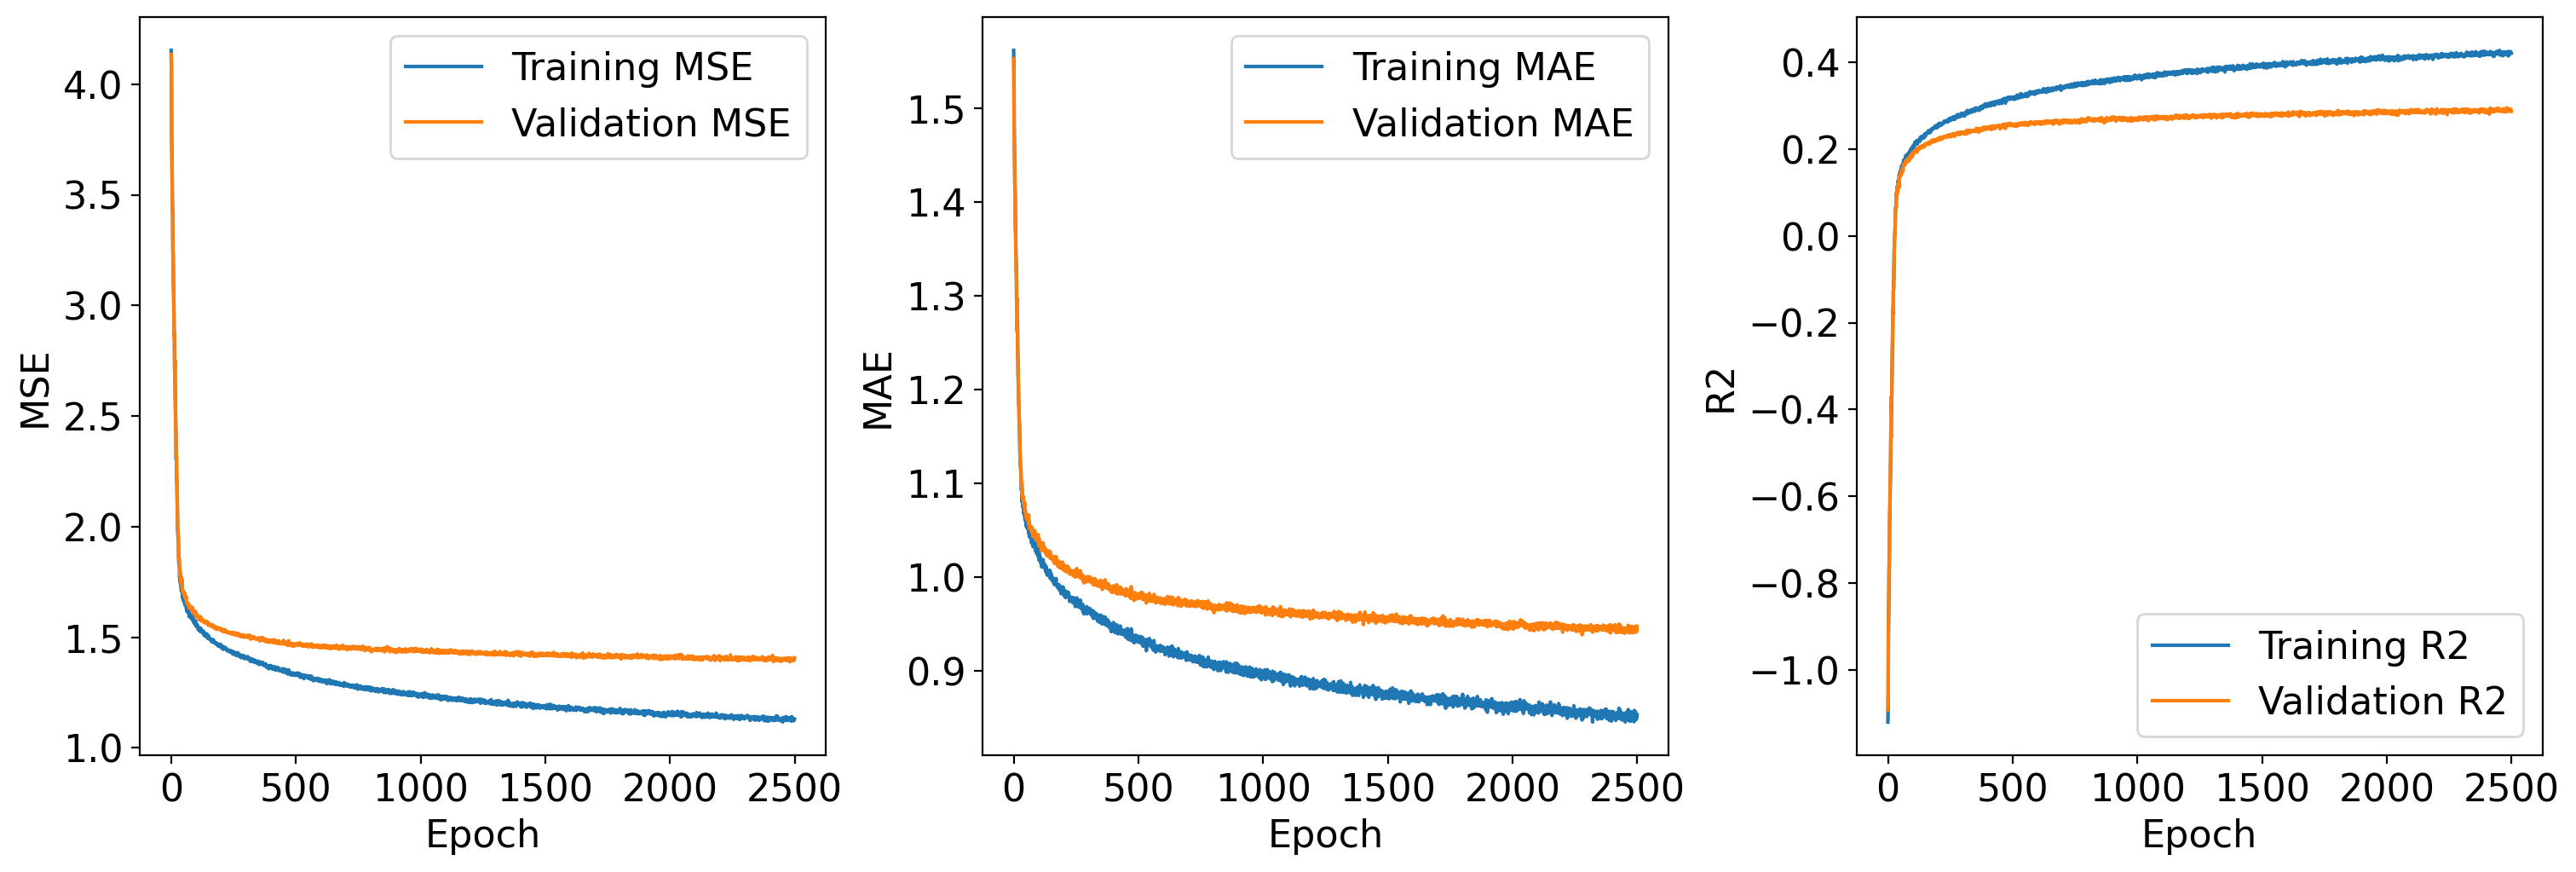

In [11]:
model = RegressionNN()

#Train on gpu and splitting up the data to training, validation and testing.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, X_temp, y_train, y_temp = train_test_split(input,band_gaps, test_size=0.3, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay= 1e-5)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

train_losses = []
val_losses = []

# Lists to store training and validation MSEs and MAEs for plotting
train_mses = []
val_mses = []
train_maes = []
val_maes = []

train_r2s = []
val_r2s = []

# Training the model
num_epochs = 2500

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device).float(), labels.to(device).float()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        train_loss = 0.0
        train_mse = 0.0
        train_mae = 0.0
        train_r2 = 0.0
        total_train = 0

        for train_inputs, train_labels in train_loader:
            train_inputs, train_labels = train_inputs.to(device).float(), train_labels.to(device).float()
            train_outputs = model(train_inputs)
            train_loss += criterion(train_outputs, train_labels).item()
            train_mse += nn.functional.mse_loss(train_outputs, train_labels).item()
            train_mae += nn.functional.l1_loss(train_outputs, train_labels).item()
            train_r2 += r2_score(train_labels.cpu().numpy(), train_outputs.cpu().numpy())

        avg_train_loss = train_loss / len(train_loader)
        avg_train_mse = train_mse / len(train_loader)
        avg_train_mae = train_mae / len(train_loader)
        avg_train_r2 = train_r2 / len(train_loader)

        val_loss = 0.0
        val_mse = 0.0
        val_mae = 0.0
        val_r2 = 0.0
        total_val = 0

        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device).float(), val_labels.to(device).float()
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()
            val_mse += nn.functional.mse_loss(val_outputs, val_labels).item()
            val_mae += nn.functional.l1_loss(val_outputs, val_labels).item()
            val_r2 += r2_score(val_labels.cpu().numpy(), val_outputs.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        avg_val_mse = val_mse / len(val_loader)
        avg_val_mae = val_mae / len(val_loader)
        avg_val_r2 = val_r2 / len(val_loader)

    # Append losses and metrics for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_mses.append(avg_train_mse)
    val_mses.append(avg_val_mse)
    train_maes.append(avg_train_mae)
    val_maes.append(avg_val_mae)
    train_r2s.append(avg_train_r2)
    val_r2s.append(avg_val_r2)

    # Print the training and validation statistics every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Train MSE: {avg_train_mse:.4f}, Val MSE: {avg_val_mse:.4f}, Train MAE: {avg_train_mae:.4f}, Val MAE: {avg_val_mae:.4f}, Train R2: {avg_train_r2:.4f}, Val R2: {avg_val_r2:.4f}')

# Plotting the training and validation loss curves
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation MSE curves
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_mses, label='Training MSE')
plt.plot(val_mses, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plotting the training and validation MAE curves
plt.subplot(1, 3, 2)
plt.plot(train_maes, label='Training MAE')
plt.plot(val_maes, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plotting the training and validation R2 curves
plt.subplot(1, 3, 3)
plt.plot(train_r2s, label='Training R2')
plt.plot(val_r2s, label='Validation R2')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()

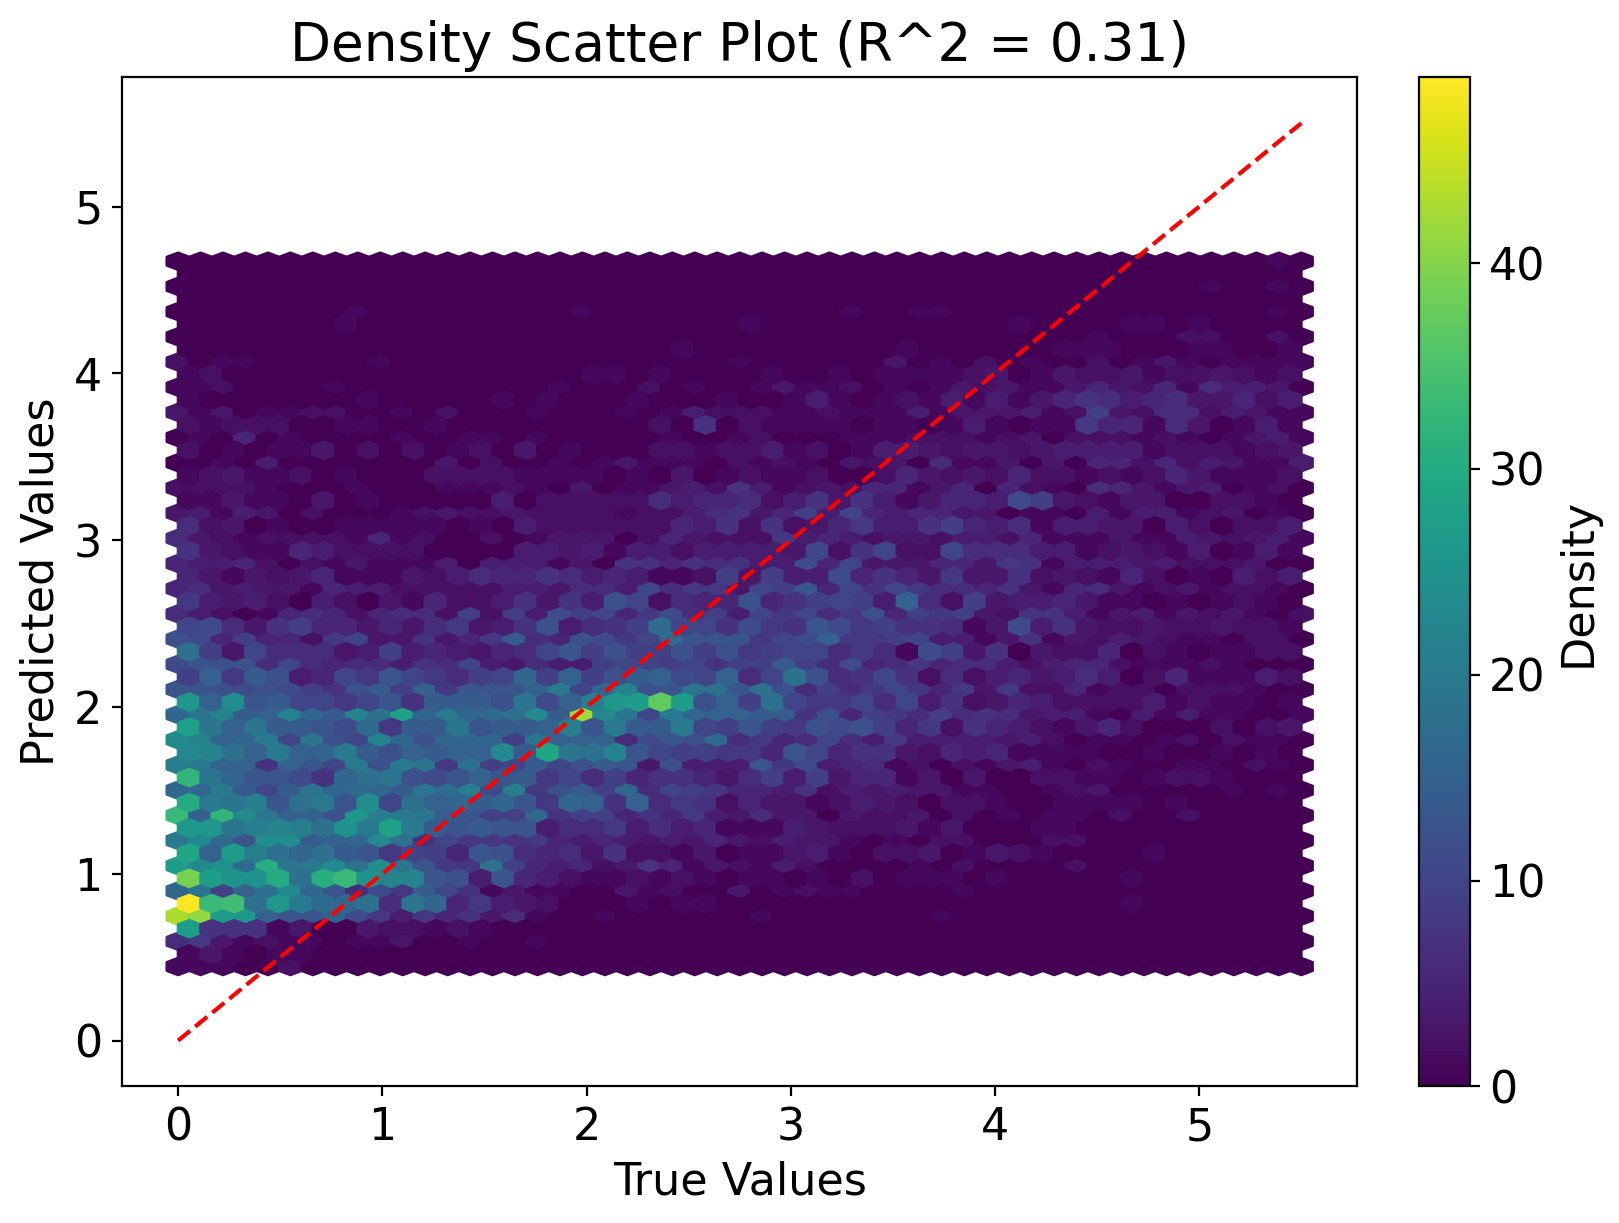

In [17]:
true_values = y_test.cpu().numpy().reshape(-1)
predicted_values = model(X_test.to(device)).cpu().detach().numpy().reshape(-1)

# Calculate R-squared value
r_squared = r2_score(true_values, predicted_values)


plt.figure(figsize=(8, 6))
plt.hexbin(true_values, predicted_values, gridsize=50, cmap='viridis')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Density Scatter Plot (R^2 = {r_squared:.2f})')
plt.colorbar(label='Density')

min_val = min(np.min(true_values), np.min(predicted_values))
max_val = max(np.max(true_values), np.max(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

In [18]:
# Testing the model
model.eval()  # Set the model to evaluation mode
test_mse = 0.0
test_mae = 0.0
test_r2 = 0.0
total_test = 0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device).float(), test_labels.to(device).float()
        test_outputs = model(test_inputs)
        test_mse += nn.functional.mse_loss(test_outputs, test_labels).item()
        test_mae += nn.functional.l1_loss(test_outputs, test_labels).item()
        test_r2 += r2_score(test_labels.cpu().numpy(), test_outputs.cpu().numpy())

    avg_test_mse = test_mse / len(test_loader)
    avg_test_mae = test_mae / len(test_loader)
    avg_test_r2 = test_r2 / len(test_loader)

print(f'Test MSE: {avg_test_mse:.4f}, Test MAE: {avg_test_mae:.4f}, Test R2: {avg_test_r2:.4f}')


Test MSE: 1.3642, Test MAE: 0.9267, Test R2: 0.3037


Epoch [100/2500]
Model 1 - Epoch [100/2500], Train MSE: 1.6318, Val MSE: 1.6738, Train R2: 0.1668, Val R2: 0.1532, Train MAE: 1.0355, Val MAE: 1.0480
Model 2 - Epoch [100/2500], Train MSE: 1.5989, Val MSE: 1.6382, Train R2: 0.1844, Val R2: 0.1718, Train MAE: 1.0270, Val MAE: 1.0382
Model 3 - Epoch [100/2500], Train MSE: 1.6493, Val MSE: 1.6895, Train R2: 0.1579, Val R2: 0.1460, Train MAE: 1.0413, Val MAE: 1.0525
Epoch [200/2500]
Model 1 - Epoch [200/2500], Train MSE: 1.5359, Val MSE: 1.5891, Train R2: 0.2151, Val R2: 0.1957, Train MAE: 1.0094, Val MAE: 1.0275
Model 2 - Epoch [200/2500], Train MSE: 1.5063, Val MSE: 1.5613, Train R2: 0.2315, Val R2: 0.2098, Train MAE: 0.9942, Val MAE: 1.0130
Model 3 - Epoch [200/2500], Train MSE: 1.5419, Val MSE: 1.5901, Train R2: 0.2124, Val R2: 0.1952, Train MAE: 1.0039, Val MAE: 1.0192
Epoch [300/2500]
Model 1 - Epoch [300/2500], Train MSE: 1.5053, Val MSE: 1.5641, Train R2: 0.2305, Val R2: 0.2083, Train MAE: 0.9983, Val MAE: 1.0187
Model 2 - Epoch [3

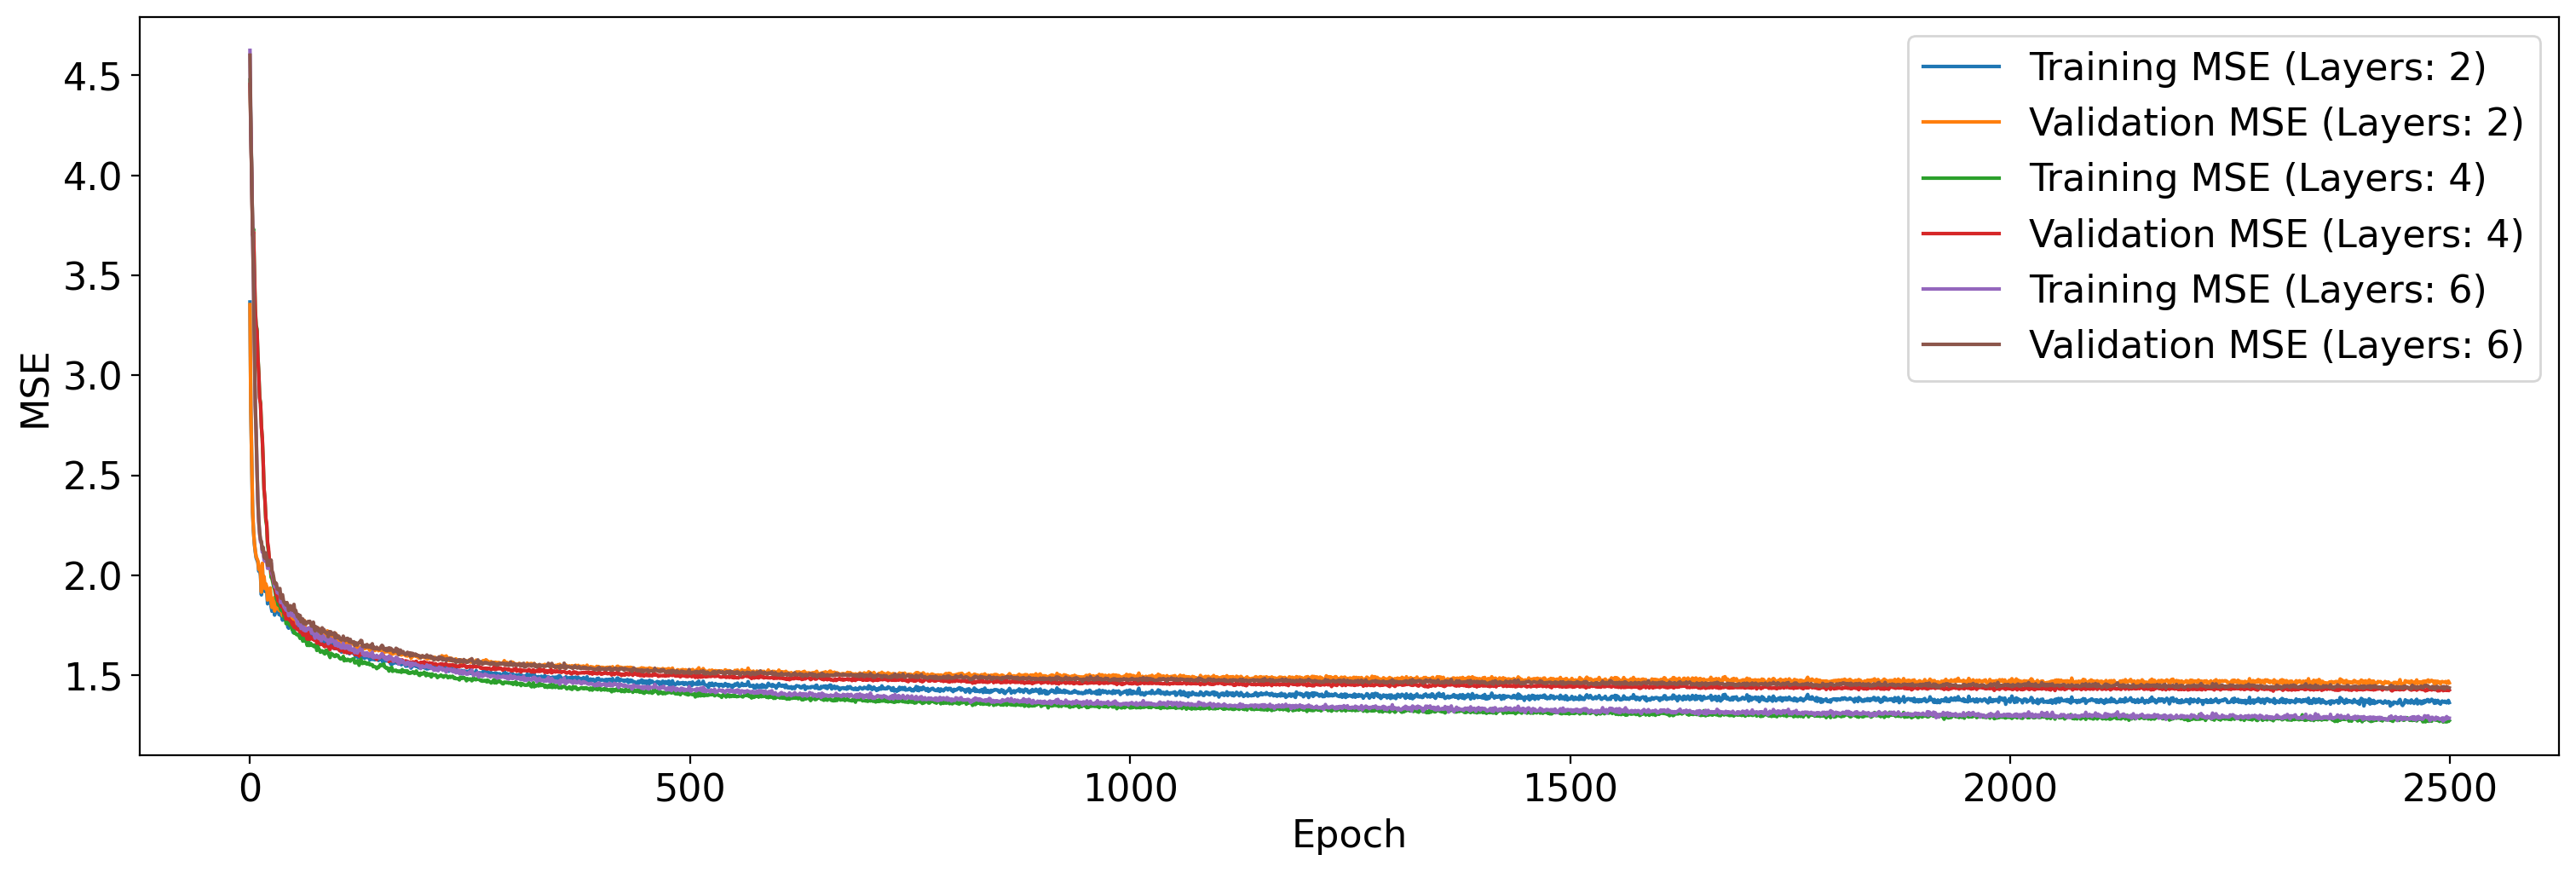

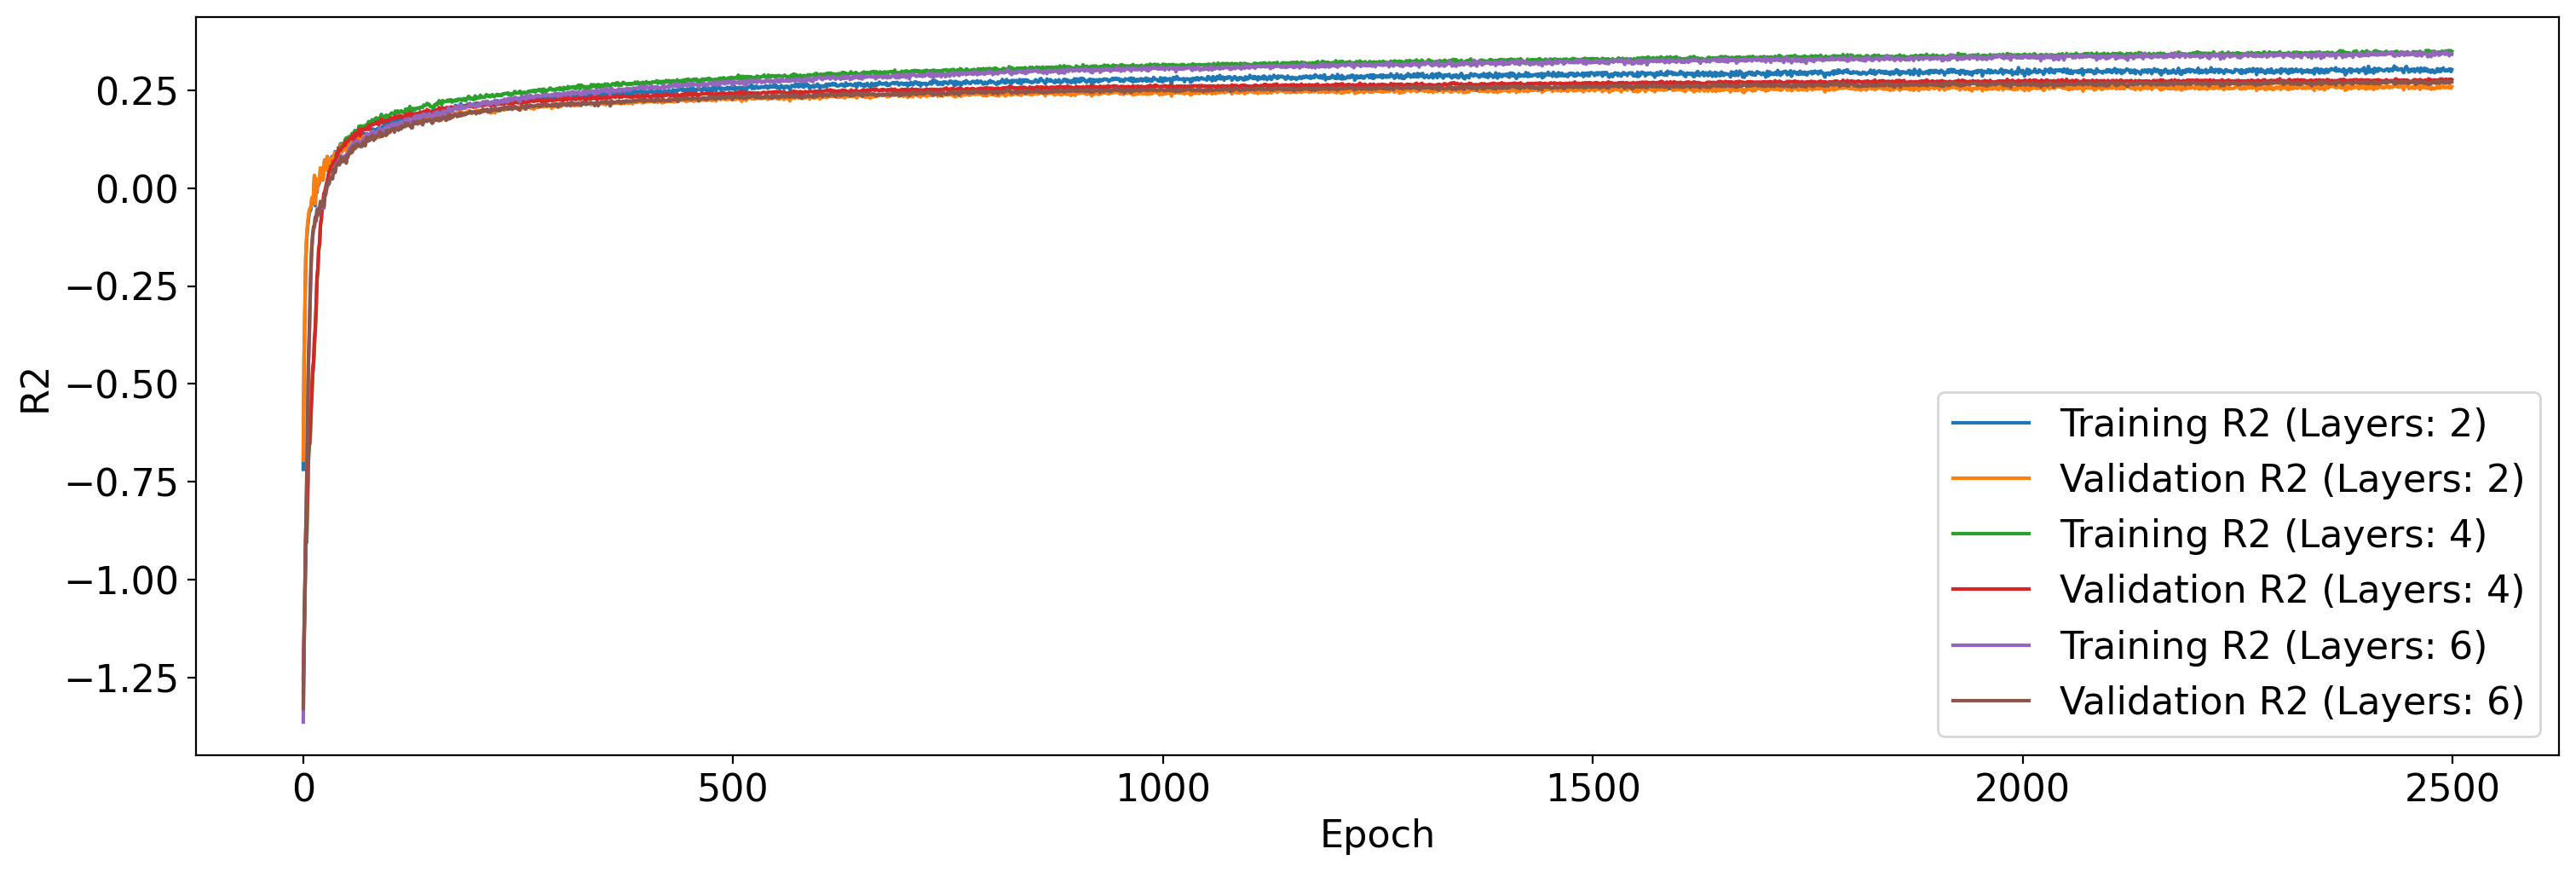

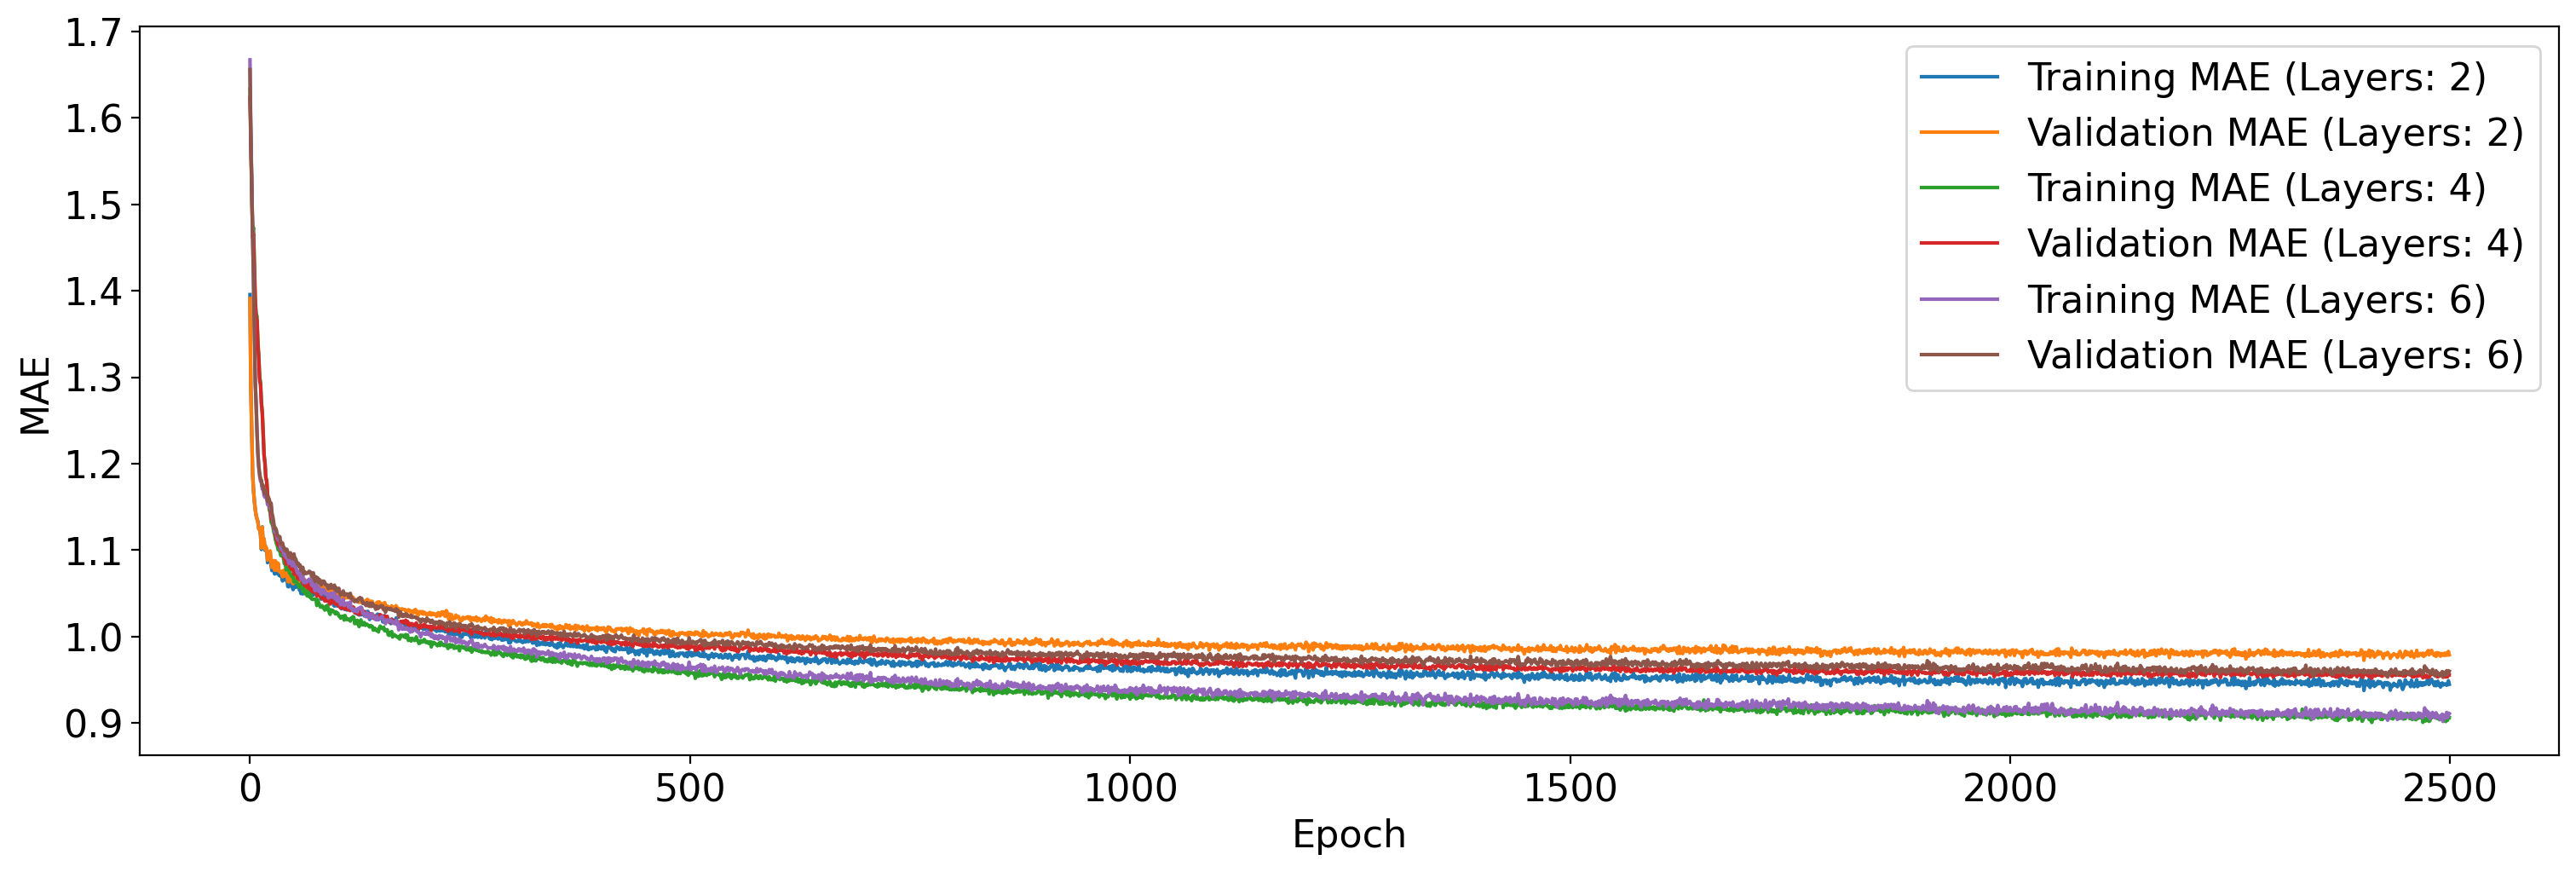

In [19]:
#Ensemble training code

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class RegressionNN(nn.Module):
    def __init__(self, num_layers):
        super(RegressionNN, self).__init__()
        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(14, 250))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(p=0.5))
        
        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(250, 250))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(p=0.5))
        
        self.layers.append(nn.Linear(250, 1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize models
models = [RegressionNN(num_layers) for num_layers in [2, 4, 6]]

# Train on gpu and splitting up the data to training, validation and testing.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, X_temp, y_train, y_temp = train_test_split(input, band_gaps, test_size=0.3, random_state=64)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

for model in models:
    model.to(device)

criterion = nn.MSELoss()
optimizers = [optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5) for model in models]

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Training the models
num_epochs = 2500

train_mses = [[] for _ in range(len(models))]
val_mses = [[] for _ in range(len(models))]
train_r2s = [[] for _ in range(len(models))]
val_r2s = [[] for _ in range(len(models))]
train_maes = [[] for _ in range(len(models))]
val_maes = [[] for _ in range(len(models))]

for epoch in range(num_epochs):
    for model_idx, model in enumerate(models):
        model.train()
        optimizer = optimizers[model_idx]
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device).float(), labels.to(device).float()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            train_mse = 0.0
            train_r2 = 0.0
            train_mae = 0.0
            for train_inputs, train_labels in train_loader:
                train_inputs, train_labels = train_inputs.to(device).float(), train_labels.to(device).float()
                train_outputs = model(train_inputs)
                train_mse += criterion(train_outputs, train_labels).item()
                train_r2 += r2_score(train_labels.cpu().numpy(), train_outputs.cpu().numpy())
                train_mae += np.abs(train_labels.cpu().numpy() - train_outputs.cpu().numpy()).mean()

            avg_train_mse = train_mse / len(train_loader)
            avg_train_r2 = train_r2 / len(train_loader)
            avg_train_mae = train_mae / len(train_loader)

            val_mse = 0.0
            val_r2 = 0.0
            val_mae = 0.0
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device).float(), val_labels.to(device).float()
                val_outputs = model(val_inputs)
                val_mse += criterion(val_outputs, val_labels).item()
                val_r2 += r2_score(val_labels.cpu().numpy(), val_outputs.cpu().numpy())
                val_mae += np.abs(val_labels.cpu().numpy() - val_outputs.cpu().numpy()).mean()

            avg_val_mse = val_mse / len(val_loader)
            avg_val_r2 = val_r2 / len(val_loader)
            avg_val_mae = val_mae / len(val_loader)

            train_mses[model_idx].append(avg_train_mse)
            val_mses[model_idx].append(avg_val_mse)
            train_r2s[model_idx].append(avg_train_r2)
            val_r2s[model_idx].append(avg_val_r2)
            train_maes[model_idx].append(avg_train_mae)
            val_maes[model_idx].append(avg_val_mae)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        for model_idx, model in enumerate(models):
            print(f'Model {model_idx + 1} - Epoch [{epoch+1}/{num_epochs}], Train MSE: {train_mses[model_idx][-1]:.4f}, Val MSE: {val_mses[model_idx][-1]:.4f}, Train R2: {train_r2s[model_idx][-1]:.4f}, Val R2: {val_r2s[model_idx][-1]:.4f}, Train MAE: {train_maes[model_idx][-1]:.4f}, Val MAE: {val_maes[model_idx][-1]:.4f}')

# Plotting the training and validation MSE curves
plt.figure(figsize=(15, 5))
for i in range(len(models)):
    plt.plot(train_mses[i], label=f'Training MSE (Layers: {2*i+2})')
    plt.plot(val_mses[i], label=f'Validation MSE (Layers: {2*i+2})')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the training and validation R2 curves
plt.figure(figsize=(15, 5))
for i in range(len(models)):
    plt.plot(train_r2s[i], label=f'Training R2 (Layers: {2*i+2})')
    plt.plot(val_r2s[i], label=f'Validation R2 (Layers: {2*i+2})')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.legend()
plt.show()

# Plotting the training and validation MAE curves
plt.figure(figsize=(15, 5))
for i in range(len(models)):
    plt.plot(train_maes[i], label=f'Training MAE (Layers: {2*i+2})')
    plt.plot(val_maes[i], label=f'Validation MAE (Layers: {2*i+2})')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [23]:
# Testing the ensemble of models
test_losses = []
test_r2s = []
test_maes = []

for model_idx, model in enumerate(models):
    model.eval() 
    test_loss = 0.0
    test_r2 = 0.0
    test_mae = 0.0

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:
            test_inputs, test_labels = test_inputs.to(device).float(), test_labels.to(device).float()
            test_outputs = model(test_inputs)
            test_loss += criterion(test_outputs, test_labels).item()
            test_r2 += r2_score(test_labels.cpu().numpy(), test_outputs.cpu().numpy())
            test_mae += np.mean(np.abs(test_outputs.cpu().numpy() - test_labels.cpu().numpy()))

        avg_test_loss = test_loss / len(test_loader)
        avg_test_r2 = test_r2 / len(test_loader)
        avg_test_mae = test_mae / len(test_loader)

        test_losses.append(avg_test_loss)
        test_r2s.append(avg_test_r2)
        test_maes.append(avg_test_mae)

        print(f'Model {model_idx + 1} - Test MSE: {avg_test_loss:.4f}, Test R2: {avg_test_r2:.4f}, Test MAE: {avg_test_mae:.4f}')


Model 1 - Test MSE: 1.4407, Test R2: 0.2671, Test MAE: 0.9686
Model 2 - Test MSE: 1.3960, Test R2: 0.2884, Test MAE: 0.9432
Model 3 - Test MSE: 1.4047, Test R2: 0.2840, Test MAE: 0.9476
